In [1]:
import pandas as pd

dataset_path = "/home/public/tweetdatanlp/GeoText.2010-10-12/full_text.txt"

col_names = ["UserID", "Timestamp", "Place", "Latitude", "Longitude", "TweetText"]

df = pd.read_csv(
    dataset_path,
    sep="\t",          
    encoding="latin1",
    dtype={"TweetText": str}, 
    names=col_names,

)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['UnixTimestamp'] = df['Timestamp'].astype('int64') // 10**9

df.head()

,UserID,Timestamp,Place,Latitude,Longitude,TweetText,UnixTimestamp
0,USER_79321756,2010-03-03 04:15:26,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,RT @USER_2ff4faca: IF SHE DO IT 1 MORE TIME......,1267589726
1,USER_79321756,2010-03-03 04:55:32,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,@USER_77a4822d @USER_2ff4faca okay:) lol. Sayi...,1267592132
2,USER_79321756,2010-03-03 05:13:34,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,RT @USER_5d4d777a: YOURE A FAG FOR GETTING IN ...,1267593214
3,USER_79321756,2010-03-03 05:28:02,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,@USER_77a4822d yea ok..well answer that cheap ...,1267594082
4,USER_79321756,2010-03-03 05:56:13,"ÃT: 47.528139,-122.197916",47.528139,-122.197916,A sprite can disappear in her mouth - lil kim ...,1267595773


# Important Metrics
### User Activity Metrics
- Number of users
- Average posts per users
- Highest post by a user
- Lowest post by a user
- Standard deviation of posts per user



Number of users : 9454
Average posts per user : 39.825576475565896
Max posts by a user : 301
Min posts by a user : 2
Median posts per user : 32.0
Std dev of posts per user : 24.412355892822596
Variance of posts per user : 595.9631202378301
Total Tweets posted by all users : 376511


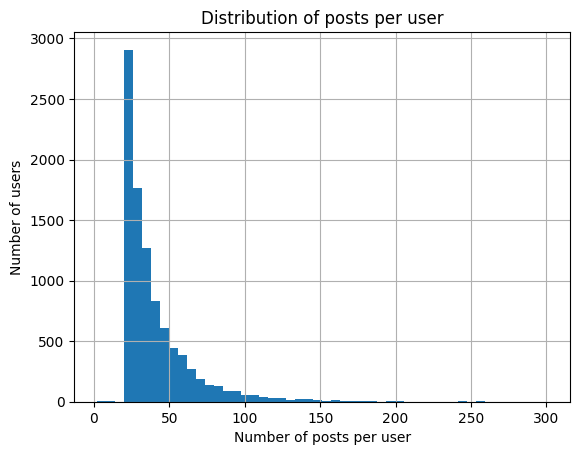

In [2]:
user_post_counts = df.groupby('UserID').size()

num_users = user_post_counts.shape[0] 
avg_posts = user_post_counts.mean()                         
max_posts = user_post_counts.max()                         
min_posts = user_post_counts.min()                          
median_posts = user_post_counts.median()                    
std_posts = user_post_counts.std() 
var_posts = user_post_counts.var()
total_posts = len(df) 

# Display metrics
metrics = {
    "Number of users": num_users,
    "Average posts per user": avg_posts,
    "Max posts by a user": max_posts,
    "Min posts by a user": min_posts,
    "Median posts per user": median_posts,
    "Std dev of posts per user": std_posts,
    "Variance of posts per user": var_posts,
    "Total Tweets posted by all users": total_posts
}


for k, v in metrics.items():
    print(k , ":", v)

import matplotlib.pyplot as plt

user_post_counts.hist(bins=50)
plt.xlabel("Number of posts per user")
plt.ylabel("Number of users")
plt.title("Distribution of posts per user")
plt.show()

Problems that can arise from a skewed dataset
- Bias prediction on more active users (model might think their behaivor dominates the pattern)
    - Model might predict Super-active users -> overfit their patterns
    - Might not generalize to less active users tweets <br>

Possible Solutions
- Oversample the less active users
- Filter out less active users or overly active user (maybe not)

### Temporal Metrics
- Timespan of the dataset
- Average time between tweets

In [3]:
time_df = df.sort_values('Timestamp').reset_index(drop=True)
time_span = time_df['Timestamp'].max() - time_df['Timestamp'].min()
# Compute inter-tweet times per user
inter_tweet_times = time_df.groupby('UserID')['Timestamp'].diff().dropna()

# Convert to hours
inter_tweet_hours = inter_tweet_times.dt.total_seconds() / 3600

# Compute metrics
avg_inter_tweet_hours = inter_tweet_hours.mean()
median_inter_tweet_hours = inter_tweet_hours.median()

print(f"Average time between tweets for each user: {avg_inter_tweet_hours:.2f} hours")
print(f"Median time between tweet: {median_inter_tweet_hours:.2f} hours")


Average time between tweets for each user: 2.72 hours
Median time between tweet: 0.55 hours


### Spatial Metrics
- Check some spatial metrics
- Average distance between tweets
- ETC.

### Tweet metrics

Max tokens in a tweet: 3686
Min tokens in a tweet: 1
Average tokens per tweet: 11.86


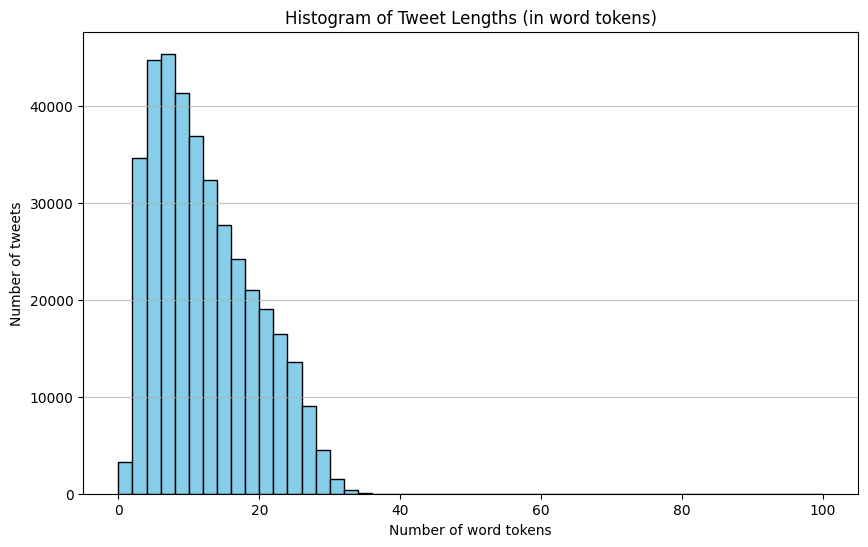

In [4]:
# Count word tokens per tweet
df['NumTokens'] = df['TweetText'].apply(lambda x: len(str(x).split()))

# Compute statistics
max_tokens = df['NumTokens'].max()
min_tokens = df['NumTokens'].min()
avg_tokens = df['NumTokens'].mean()

print(f"Max tokens in a tweet: {max_tokens}")
print(f"Min tokens in a tweet: {min_tokens}")
print(f"Average tokens per tweet: {avg_tokens:.2f}")

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['NumTokens'], bins=50, range=(0,100), color='skyblue', edgecolor='black')
plt.title("Histogram of Tweet Lengths (in word tokens)")
plt.xlabel("Number of word tokens")
plt.ylabel("Number of tweets")
plt.grid(axis='y', alpha=0.75)
plt.show()

### Metrics for Bert

In [5]:
# Count tweets with more than 64 tokens
num_long_tweets = (df['NumTokens'] > 64).sum()
total_tweets = len(df)
percent_long = num_long_tweets / total_tweets * 100

print(f"Number of tweets >64 tokens: {num_long_tweets}")
print(f"Percentage of tweets >64 tokens: {percent_long:.2f}%")

mean_tokens = df['NumTokens'].mean()
std_tokens = df['NumTokens'].std()

print(f"Average tokens per tweet: {mean_tokens:.2f}")
print(f"Standard deviation of tokens: {std_tokens:.2f}")

Number of tweets >64 tokens: 26
Percentage of tweets >64 tokens: 0.01%
Average tokens per tweet: 11.86
Standard deviation of tokens: 12.52


- Majority of tweets are short, ≤24 tokens, which makes truncation at 64 tokens completely safe.
- So it won’t be perfectly normal, but std still gives a good sense of spread.
- Your data is skewed because of outliers (like the 3686-token tweet).

### Other Metrics (NUll etc.)

In [6]:
df.isnull().sum()

UserID           0
Timestamp        0
Place            0
Latitude         0
Longitude        0
TweetText        2
UnixTimestamp    0
NumTokens        0
dtype: int64

# Preprocessing
- Normalize -> get w
- First tokenize the input
- Drop the outliers max_tokens > 64

In [19]:
import pandas as pd
from TweetNormalizer import normalizeTweet

dataset_path = "/home/public/tweetdatanlp/GeoText.2010-10-12/full_text.txt"

col_names = ["UserID", "Timestamp", "Place", "Latitude", "Longitude", "TweetText"]
# load the dataset
df = pd.read_csv(
    dataset_path,
    sep="\t",          
    encoding="latin1",
    dtype={"TweetText": str}, 
    names=col_names,

)
# -------------------- Preprocessing --------------------------#
# convert to timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['UnixTimestamp'] = df['Timestamp'].astype('int64') // 10**9

# drop nulls
df_cleaned = df.dropna()

# Normalize the tweets (takes 40 seconds)
df_cleaned['NormalizedText'] = df_cleaned['TweetText'].apply(normalizeTweet)

# Dropping outlier
df_cleaned['Tokens'] = df_cleaned['NormalizedText'].apply(lambda x: x.split())
df_cleaned = df_cleaned[df_cleaned['Tokens'].apply(len) <= 64].reset_index(drop=True)

# Normalizing timestamps to [0,1]
MIN_TIME = df_cleaned['UnixTimestamp'].min()
MAX_TIME = df_cleaned['UnixTimestamp'].max()
df_cleaned["Timestamp"] = (df_cleaned['UnixTimestamp'] - MIN_TIME) / (MAX_TIME - MIN_TIME)
print(f"The minimum unix time: {MIN_TIME} and Max unix time: {MAX_TIME}")

# Cols to keep
col_to_keep= ["UserID", "Timestamp", "NormalizedText", "Latitude", "Longitude"]
final_df  = df_cleaned[col_to_keep]
final_df.head()


/tmp/ipykernel_3871727/3425041073.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NormalizedText'] = df_cleaned['TweetText'].apply(normalizeTweet)
/tmp/ipykernel_3871727/3425041073.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tokens'] = df_cleaned['NormalizedText'].apply(lambda x: x.split())


The minimum unix time: 1267569609 and Max unix time: 1268006399


,UserID,Timestamp,NormalizedText,Latitude,Longitude
0,USER_79321756,0.046056,RT @USER : IF SHE DO IT 1 MORE TIME ... IMA KN...,47.528139,-122.197916
1,USER_79321756,0.051565,@USER @USER okay :) lol . Saying ok to both of...,47.528139,-122.197916
2,USER_79321756,0.054042,RT @USER : YOURE A FAG FOR GETTING IN THE MIDD...,47.528139,-122.197916
3,USER_79321756,0.056029,@USER yea ok .. well answer that cheap as Swed...,47.528139,-122.197916
4,USER_79321756,0.059901,A sprite can disappear in her mouth - lil kim ...,47.528139,-122.197916


After Normalizing the whole Timestamps of the dataset we found that the minimum unix time: 1267569609 and Max unix time: 1268006399

# Sentence Embeddings

In [3]:
import torch

print("Using # GPU: ", torch.cuda.device_count())
DEVICE = "cuda" if torch.cuda.is_available()  else "cpu"
device = torch.device(f"{DEVICE}:0")
print("using device: ", device)

Using # GPU:  8
using device:  cuda:0


### TwHIN-BERT
https://huggingface.co/Twitter/twhin-bert-base

Twittters own 
traained on 7 billion Tweets from over 100 distinct languages
It not only outperforms similar models semantic understanding tasks such text classification),

In [7]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained('Twitter/twhin-bert-base')
model = AutoModel.from_pretrained('Twitter/twhin-bert-base').to(device)

Some weights of BertModel were not initialized from the model checkpoint at Twitter/twhin-bert-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
model.eval()
inputs = tokenizer("I'm using TwHIN-BERT! #TwHIN-BERT #NLP", return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)
    print(outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.2219,  0.0587,  0.5724,  ...,  0.3658, -0.2510,  0.1592],
         [ 0.4480, -0.5239,  1.3285,  ...,  0.2185, -0.2141,  0.3172],
         [-0.4613,  0.2629,  0.6751,  ..., -0.5673,  0.5312,  0.5227],
         ...,
         [ 0.4649,  0.2615,  1.5457,  ...,  0.2790,  0.0780,  0.1438],
         [-0.4481, -0.2933,  1.1591,  ...,  0.7038,  0.4575,  0.2947],
         [ 0.2101,  0.0640,  0.5792,  ...,  0.3776, -0.2562,  0.1553]]],
       device='cuda:0'), pooler_output=tensor([[-0.1433, -0.2111, -0.5500, -0.2013, -0.3644, -0.1742, -0.1847, -0.2472,
         -0.0348,  0.2365, -0.1521,  0.1951,  0.1606, -0.2316, -0.0176, -0.0945,
         -0.1576, -0.5464,  0.5330, -0.4849, -0.1552, -0.2046,  0.2397,  0.2663,
          0.0074,  0.3494,  0.1063, -0.3701,  0.0673,  0.0913, -0.0115, -0.1265,
          0.0118, -0.3736,  0.0959, -0.0490, -0.0799,  0.0093, -0.0724,  0.1762,
          0.1582, -0.3577, -0.4748,  0.0115, -0.065

### MiniLM Sentence Transformer

Would output sentence embeddings of size 384 dimension

In [38]:
# 384 Dimensional Vector
import torch
from TweetNormalizer import normalizeTweet
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2").to(device)

In [37]:
final_df = final_df.sort_values(by=['UserID', 'Timestamp']).reset_index(drop=True)
final_df.head()

,UserID,Timestamp,NormalizedText,Latitude,Longitude
0,USER_00024ea8,0.015369,@USER he is under the weather â  ,33.921464,-84.340911
1,USER_00024ea8,0.033382,@USER are we on the same page ?,33.921464,-84.340911
2,USER_00024ea8,0.052210,This bitch is drunk bootz and its not even mid...,33.827292,-84.350852
3,USER_00024ea8,0.196509,@USER Good Evening now ..,33.825300,-84.358758
4,USER_00024ea8,0.196575,@USER yes it was great seeing u n the boo last...,33.825300,-84.358758


Convert the sentences to embeddings and save to disk
- would take .5 GB of space

In [55]:
import torch
import numpy as np
from tqdm import tqdm

batch_size = 128
embeddings_list = []

sentences = final_df["NormalizedText"].tolist()

for i in tqdm(range(0, len(sentences), batch_size)):
    batch = sentences[i:i+batch_size]
    batch_embeddings = model.encode(batch, convert_to_tensor=True, show_progress_bar=False)
    embeddings_list.append(batch_embeddings.cpu().numpy())

100%|██████████| 2940/2940 [02:15<00:00, 21.76it/s]


In [56]:
all_embeddings = np.vstack(embeddings_list)
all_embeddings.shape

(376318, 384)

In [57]:
np.save("/home/public/tweetdatanlp/sent-trans-dbs/tweet_embeddings.npy", all_embeddings)
final_df[["UserID", "Timestamp", "Latitude", "Longitude"]].to_csv("/home/public/tweetdatanlp/sent-trans-dbs/tweet_metadata.csv", index=False)
print("Saved to disk")

Saved to disk


DONE- ---------------